In [3]:
import os, sys
from google.colab import drive
drive.mount('/content/drive/')
os.chdir("/content/drive/My Drive/main project/")
sys.path.append("/content/drive/My Drive/main project/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import pickle

In [5]:
# Load the dataset
file_path = '/content/drive/My Drive/main project/imdb_top_movies.csv'
movies_df = pd.read_csv(file_path)


In [6]:
# EDA
# 1. Display basic information about the dataset
print("Dataset Information:")
movies_df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Movie Name    2000 non-null   object 
 1   Release Year  2000 non-null   object 
 2   Duration      2000 non-null   int64  
 3   IMDB Rating   2000 non-null   float64
 4   Metascore     1919 non-null   float64
 5   Votes         2000 non-null   object 
 6   Genre         2000 non-null   object 
 7   Director      2000 non-null   object 
 8   Cast          2000 non-null   object 
 9   Gross         1903 non-null   object 
 10  Overview      2000 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 172.0+ KB


In [7]:
# 2. Display basic statistics
print("\nBasic Statistics:")
print(movies_df.describe(include='all'))


Basic Statistics:
       Movie Name Release Year     Duration  IMDB Rating    Metascore  \
count        2000         2000  2000.000000  2000.000000  1919.000000   
unique       1981          112          NaN          NaN          NaN   
top      The Omen         2007          NaN          NaN          NaN   
freq            2          123          NaN          NaN          NaN   
mean          NaN          NaN   113.939000     6.922600    61.044294   
std           NaN          NaN    22.946035     0.955618    17.937722   
min           NaN          NaN    50.000000     1.500000     9.000000   
25%           NaN          NaN    98.000000     6.400000    48.000000   
50%           NaN          NaN   110.000000     7.000000    61.000000   
75%           NaN          NaN   125.000000     7.600000    74.000000   
max           NaN          NaN   271.000000     9.300000   100.000000   

          Votes                   Genre          Director        Cast   Gross  \
count      2000        

In [8]:
# 3. Check for missing values
print("\nMissing Values:")
print(movies_df.isnull().sum())



Missing Values:
Movie Name       0
Release Year     0
Duration         0
IMDB Rating      0
Metascore       81
Votes            0
Genre            0
Director         0
Cast             0
Gross           97
Overview         0
dtype: int64


In [9]:
# 4. Check for duplicates
print("\nDuplicate Rows:")
print(movies_df.duplicated().sum())


Duplicate Rows:
0


In [10]:
# Handle missing values
movies_df['Metascore'].fillna(movies_df['Metascore'].median(), inplace=True)



In [11]:
# Remove dollar signs and 'M' and convert to numeric
movies_df['Gross'] = movies_df['Gross'].str.replace('$', '').str.replace('M', '').astype(float)

# Now try filling missing values again
movies_df['Gross'].fillna(movies_df['Gross'].median(), inplace=True)

In [12]:
# 3. Check for missing values
print("\nMissing Values:")
print(movies_df.isnull().sum())


Missing Values:
Movie Name      0
Release Year    0
Duration        0
IMDB Rating     0
Metascore       0
Votes           0
Genre           0
Director        0
Cast            0
Gross           0
Overview        0
dtype: int64


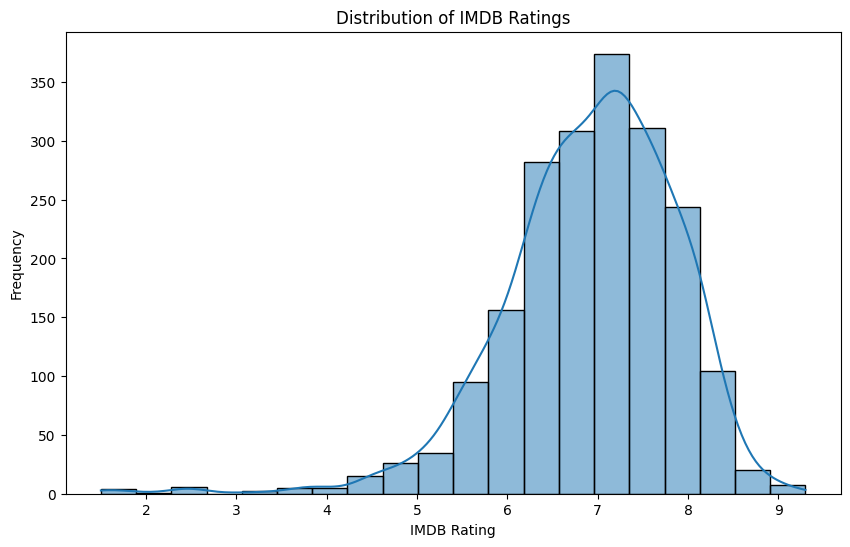

In [13]:
# 5. Distribution of IMDB Ratings
plt.figure(figsize=(10, 6))
sns.histplot(movies_df['IMDB Rating'], bins=20, kde=True)
plt.title('Distribution of IMDB Ratings')
plt.xlabel('IMDB Rating')
plt.ylabel('Frequency')
plt.show()

<ipython-input-14-ed79760b61ec>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.index, y=top_genres.values, palette='viridis')


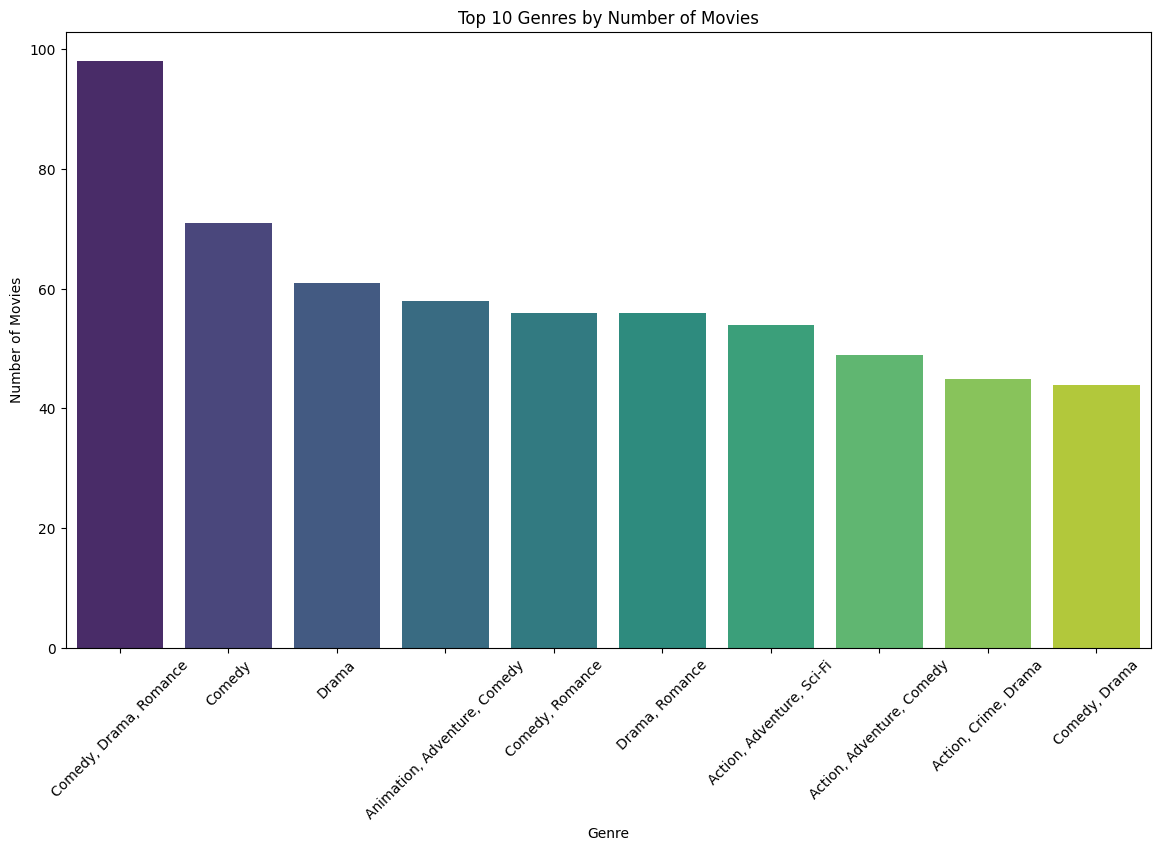

In [14]:
# 7. Top 10 Genres by Number of Movies
plt.figure(figsize=(14, 8))
top_genres = movies_df['Genre'].value_counts().head(10)
sns.barplot(x=top_genres.index, y=top_genres.values, palette='viridis')
plt.title('Top 10 Genres by Number of Movies')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

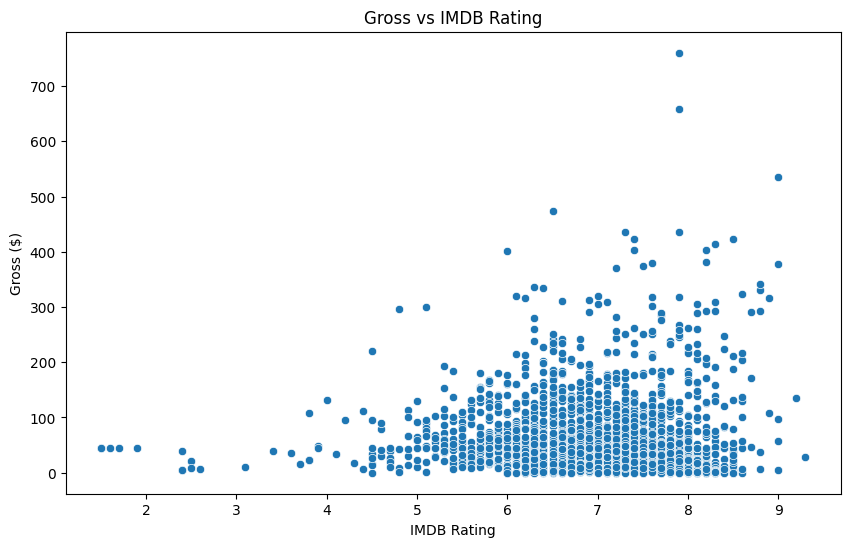

In [15]:
# 8. Scatter plot of Gross vs IMDB Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='IMDB Rating', y='Gross', data=movies_df)
plt.title('Gross vs IMDB Rating')
plt.xlabel('IMDB Rating')
plt.ylabel('Gross ($)')
plt.show()

In [16]:
print(movies_df[['IMDB Rating', 'Metascore', 'Votes', 'Gross']].dtypes)

IMDB Rating    float64
Metascore      float64
Votes           object
Gross          float64
dtype: object


In [17]:
# Convert 'Votes' column to numeric
movies_df['Votes'] = movies_df['Votes'].str.replace(',', '').astype(int)

# Now calculate the correlation matrix
corr_matrix = movies_df[['IMDB Rating', 'Metascore', 'Votes', 'Gross']].corr()

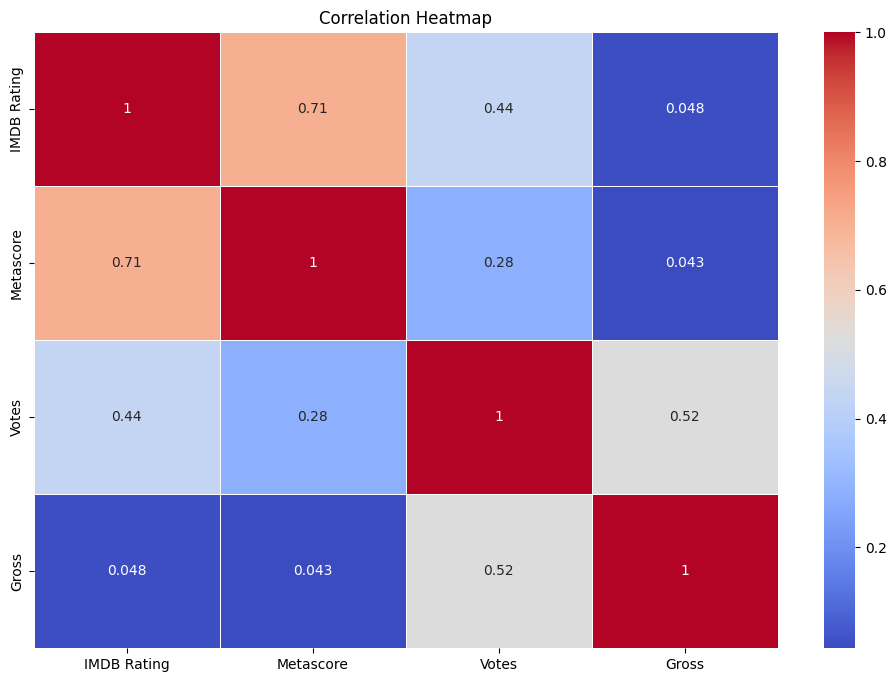

In [18]:
# 9. Correlation heatmap
plt.figure(figsize=(12, 8))
corr_matrix = movies_df[['IMDB Rating', 'Metascore', 'Votes', 'Gross']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


<ipython-input-19-fa34f0d2df93>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x=column, y="Movie Name", palette="viridis")


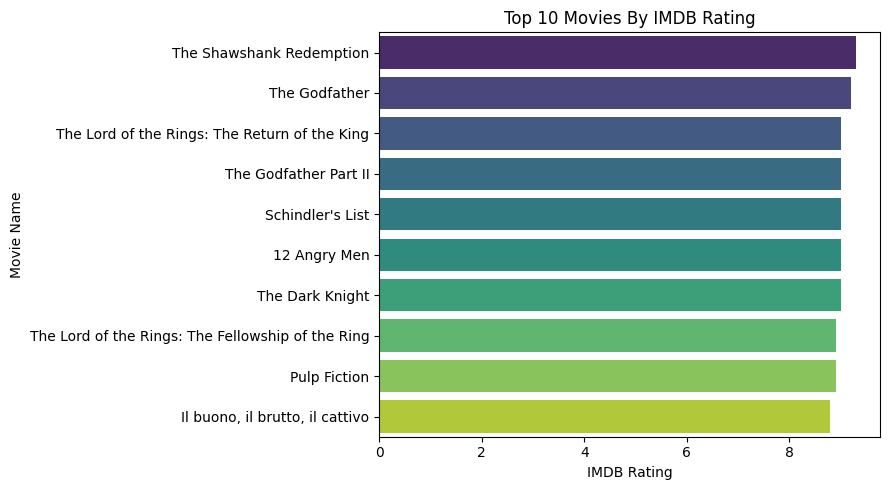

In [19]:
def top_10_movies(column, movies_df=movies_df):
    data = movies_df.sort_values(by=column, ascending=False, ignore_index=True)
    data = data[["Movie Name", column]].head(10)
    plt.figure(figsize=(9, 5))
    sns.barplot(data=data, x=column, y="Movie Name", palette="viridis")
    plt.title(f"Top 10 Movies By {column}")
    plt.tight_layout()
    plt.show()
top_10_movies("IMDB Rating")


<ipython-input-19-fa34f0d2df93>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x=column, y="Movie Name", palette="viridis")


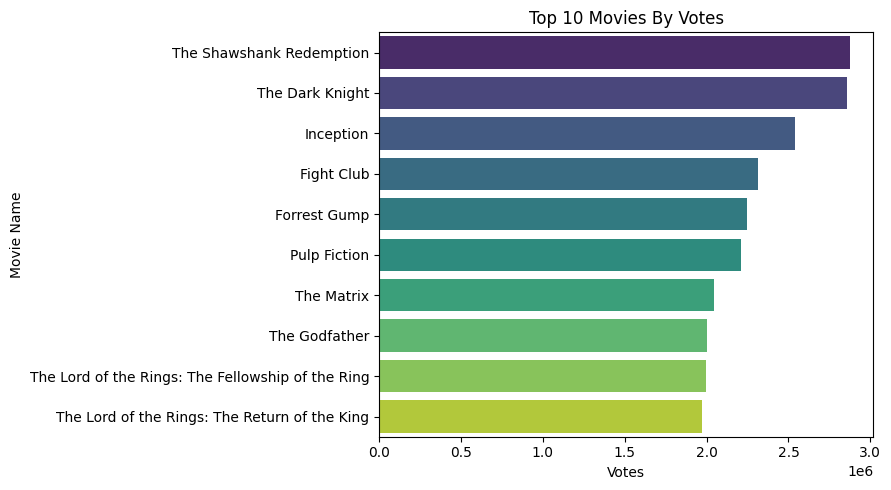

In [20]:
top_10_movies("Votes")

In [25]:
# # Preprocessing
movies_df['Gross'] = movies_df['Gross'].astype(str).str.replace('[\$,]', '').astype(float) # Convert 'Gross' column to string type first
# The 'Votes' column was already converted to int in a previous step, so no need to do it again.
# If you want to make sure it's an integer column, you can check and convert if needed:
if movies_df['Votes'].dtype != 'int':
    movies_df['Votes'] = movies_df['Votes'].str.replace(',', '').astype(int)

In [27]:
# Selecting features and target
X = movies_df[['IMDB Rating', 'Genre', 'Director', 'Cast']]
y = movies_df['Movie Name']

In [29]:
# One-Hot Encoding for categorical features
from sklearn.preprocessing import OneHotEncoder # Import OneHotEncoder
# One-Hot Encoding for categorical features
ohe = OneHotEncoder()
X_encoded = ohe.fit_transform(X[['Genre', 'Director', 'Cast']]).toarray()

In [30]:
# Combine numerical and encoded categorical features
X_combined = pd.concat([pd.DataFrame(X['IMDB Rating']), pd.DataFrame(X_encoded)], axis=1)

In [36]:
# Convert all column names to strings
X_combined.columns = X_combined.columns.astype(str)

In [37]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

In [38]:
# Algorithms
from sklearn.neighbors import KNeighborsClassifier # Import the KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
algorithms = {
    'k-NN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

In [39]:
# Training and evaluating algorithms (no changes here)
results = {}
for name, algo in algorithms.items():
    algo.fit(X_train, y_train)
    y_pred = algo.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy}")

k-NN Accuracy: 0.0
Decision Tree Accuracy: 0.0
Random Forest Accuracy: 0.0025


In [40]:
# Select the best algorithm
best_algo_name = max(results, key=results.get)
best_algo = algorithms[best_algo_name]
print(f"Best Algorithm: {best_algo_name}")

Best Algorithm: Random Forest


In [41]:
# Save the best model
with open('/content/drive/MyDrive/main project/best_model.pkl', 'wb') as model_file:
    pickle.dump(best_algo, model_file)

In [50]:
# Recommendation function
def recommend_movie(imdb_rating, genre, director, cast):
    input_data = pd.DataFrame({
        'IMDB Rating': [imdb_rating],
        'Genre': [genre],
        'Director': [director],
        'Cast': [cast]
    })
    input_encoded = ohe.transform(input_data[['Genre', 'Director', 'Cast']]).toarray()
    input_combined = pd.concat([pd.DataFrame(input_data['IMDB Rating']), pd.DataFrame(input_encoded)], axis=1)
    input_combined.columns = input_combined.columns.astype(str)  # Ensure all column names are strings
    movie_prediction = best_algo.predict(input_combined)

    # Retrieve the movie details from the dataset
    recommended_movie = movie_prediction[0]
    movie_details = movies_df[movies_df['Movie Name'] == recommended_movie].iloc[0]
    return {
        'Movie Name': recommended_movie,
        'IMDB Rating': movie_details['IMDB Rating'],
        'Genre': movie_details['Genre'],
        'Cast': movie_details['Cast'],
        'Overview': movie_details['Overview']
    }

In [51]:
# Example usage
imdb_rating = 9
genre = 'Crime, Drama'
director = 'Francis Ford Coppola'
cast = 'Al Pacino'
recommended_movie = recommend_movie(imdb_rating, genre, director, cast)
print(f"Recommended Movie: {recommended_movie}")

Recommended Movie: {'Movie Name': 'The Godfather Part II', 'IMDB Rating': 9.0, 'Genre': 'Crime, Drama', 'Cast': 'Al Pacino', 'Overview': 'The Godfather Part II (1974) is a Crime, Drama film directed by Francis Ford Coppola starring Al Pacino. Rated 9.0 on IMDB.'}
